# TP1 - Compressão e Descompressão de Imagem

### Alunos:

Vinicius Silva Gomes - 2021421869

João Antonio Oliveira Pedrosa - 2019006752

In [1]:
# Importação das bibliotecas

%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Variáveis e funções auxiliares

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def psnr(predictions, targets):
    rmsev = rmse(predictions, targets)
    return 20 * np.log10(255/rmsev)

def compression_rate(original_image, compressed_image):
    original_image_size = os.stat('source.jpg').st_size
    compressed_image_size = os.stat('compressed.jpg').st_size
    
    return original_image_size/compressed_image_size

quant_matrix = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                        [12, 12, 14, 19, 26, 58, 60, 55],
                        [14, 13, 16, 24, 40, 57, 69, 56],
                        [14, 17, 22, 29, 51, 87, 80, 62],
                        [18, 22, 37, 56, 68, 109, 103, 77],
                        [24, 35, 55, 64, 81, 104, 113, 92],
                        [49, 64, 78, 87, 103, 121, 120, 101],
                        [72, 92, 95, 98, 112, 100, 103, 99]])

In [3]:
# GLOBAL
SQ = 8

Dimensões da imagem: 512x512
Tamanho da imagem (em disco): 0.262178 MB / 262.178 kB


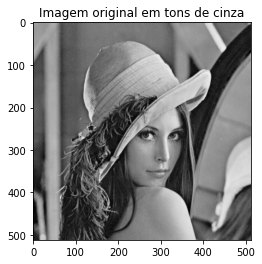

In [34]:
# Importação da imagem sem compressão e informações relevantes sobre ela

source_image = cv2.imread('lena512.pgm', 0)
source_image_size = os.stat('lena512.pgm').st_size

print("Dimensões da imagem: {}x{}".format(source_image.shape[1], source_image.shape[0]))
print("Tamanho da imagem (em disco): {} MB / {} kB".format(source_image_size/10 ** 6, source_image_size/10 ** 3))

plt.title("Imagem original em tons de cinza")
plt.imshow(source_image, cmap="gray")

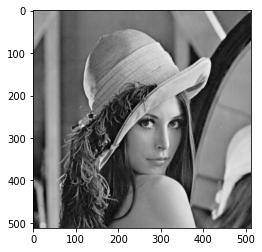

In [35]:
# Padding image
lin    = len(source_image)
col    = len(source_image[0])
xpad   = (SQ - lin % SQ) % SQ
ypad   = (SQ - col % SQ) % SQ
padded = source_image
padded = np.append(padded, np.full((xpad, col)             , 255), axis = 0)
padded = np.append(padded, np.full((lin + xpad, ypad)      , 255), axis = 1)
plt.imshow(padded, cmap="gray")
lin    = len(padded)
col    = len(padded[0])    

In [36]:
# Function that receives a SQ x SQ block and applies DCT Transform + Quantization
def apply_dct(image):
    image -= 128
    image =  image.astype(float)
    return cv2.dct(image)

def apply_idct(image):
    image =  image.astype(float)
    image = cv2.idct(image)
    image += 128
    return image

def simplify(block):
    local_dct        = apply_dct(block)
    local_quant      = local_dct / quant_matrix
    local_quant      = local_quant.round()
    # Huffman Encoding
    # Aqui a gente salva!
    # Huffman Decoding
    local_simplified = apply_idct(local_quant * quant_matrix)
    
    return local_simplified

In [ ]:
12 12 4

2 8 4
3 7
3 4 5 7
1 7
2 4 5 
2 7 8

In [ ]:
np.save()

RMSE: 4.133250767135528


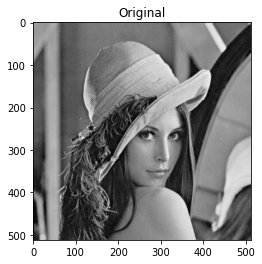

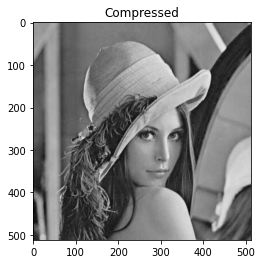

In [37]:
# Iterating
dct_full = np.zeros(padded.shape)
for l in range(0, lin, SQ):
    for c in range(0, col, SQ):
        dct_full[l:l+SQ, c:c+SQ] = simplify(padded[l:l+SQ, c:c+SQ].copy())

plt.title("Original")
plt.imshow(padded, cmap="gray",)
plt.figure()
plt.title("Compressed")
plt.imshow(dct_full, cmap="gray")
print("RMSE:", rmse(padded, dct_full))

In [38]:
# Saving
cv2.imwrite("results/original.png", padded)
cv2.imwrite("results/compressed.png", dct_full)

True

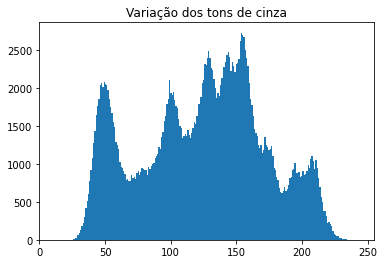

In [39]:
# Histograma com os níveis de cinza da imagem

flattered_img = source_image.ravel()

plt.hist(flattered_img, 256, [0,255]);
plt.xlim([0, 255])
plt.title("Variação dos tons de cinza")
plt.show()

In [18]:
# Método de compressão

In [16]:
# Método de descompressão

In [17]:
# Considerações e métricas sobre o processo de compressão/descompressão

# rmse_calc = rmse(source_image, idct)
# psnr_calc = psnr()
compression_rate_calc = compression_rate(source_image, source_image)

# print("Erro médio quadrático: {}".format(rmse_calc))
# print("PSNR: {}".format(psnr_calc))
print("Taxa de compressão: {}".format(round(compression_rate_calc, 4)))

Taxa de compressão: 0.5703
